In [9]:
import pandas as pd
import numpy as np
import sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, KBinsDiscretizer, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("Indicators_Heart_Disease_2022.csv")

In [23]:
pd.set_option('display.max_colwidth', None)

In [182]:
# Подсчет количества элементов в каждом классе
class_counts = data0['HadHeartAttack'].value_counts()
print(class_counts)

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246022 non-null  int32  
 1   GeneralHealth              246022 non-null  float64
 2   MentalHealthDays           246022 non-null  float64
 3   PhysicalActivities         246022 non-null  int32  
 4   SleepHours                 246022 non-null  float64
 5   HadHeartAttack             246022 non-null  object 
 6   HadAngina                  246022 non-null  int32  
 7   HadStroke                  246022 non-null  int32  
 8   HadAsthma                  246022 non-null  int32  
 9   HadSkinCancer              246022 non-null  int32  
 10  HadCOPD                    246022 non-null  int32  
 11  HadDepressiveDisorder      246022 non-null  int32  
 12  HadKidneyDisease           246022 non-null  int32  
 13  HadArthritis               24

In [18]:
data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [35]:
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [12]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [33]:
result_list = []
for column in data0.columns:
    unique_category_names = data0[column].unique()
    result_list.append({
        'Column': column,
        'Category Names': unique_category_names.tolist()
    })
unique_categories_data = pd.DataFrame(result_list)
unique_categories_data

,Column,Category Names
0,State,"[Alabama, Alaska, Arizona, Arkansas, Californi..."
1,Sex,"[Female, Male]"
2,GeneralHealth,"[Very good, Fair, Good, Excellent, Poor]"
3,PhysicalHealthDays,"[4.0, 0.0, 5.0, 3.0, 2.0, 25.0, 30.0, 15.0, 29..."
4,MentalHealthDays,"[0.0, 15.0, 4.0, 25.0, 5.0, 30.0, 27.0, 3.0, 2..."
5,LastCheckupTime,[Within past year (anytime less than 12 months...
6,PhysicalActivities,"[Yes, No]"
7,SleepHours,"[9.0, 6.0, 8.0, 5.0, 7.0, 10.0, 4.0, 12.0, 3.0..."
8,RemovedTeeth,"[None of them, 6 or more, but not all, 1 to 5,..."
9,HadHeartAttack,"[No, Yes]"


In [40]:
data.describe(include=['number', 'object']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,246022,54,Washington,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,246022,2,Female,127811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GeneralHealth,246022,5,Very good,86999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealthDays,246022.0,NaN,NaN,NaN,4.119026,8.405844,0.0,0.0,0.0,3.0,30.0
MentalHealthDays,246022.0,NaN,NaN,NaN,4.16714,8.102687,0.0,0.0,0.0,4.0,30.0
LastCheckupTime,246022,4,Within past year (anytime less than 12 months ago),198153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalActivities,246022,2,Yes,191318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SleepHours,246022.0,NaN,NaN,NaN,7.021331,1.440681,1.0,6.0,7.0,8.0,24.0
RemovedTeeth,246022,4,None of them,131592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HadHeartAttack,246022,2,No,232587,NaN,NaN,NaN,NaN,NaN,NaN,NaN


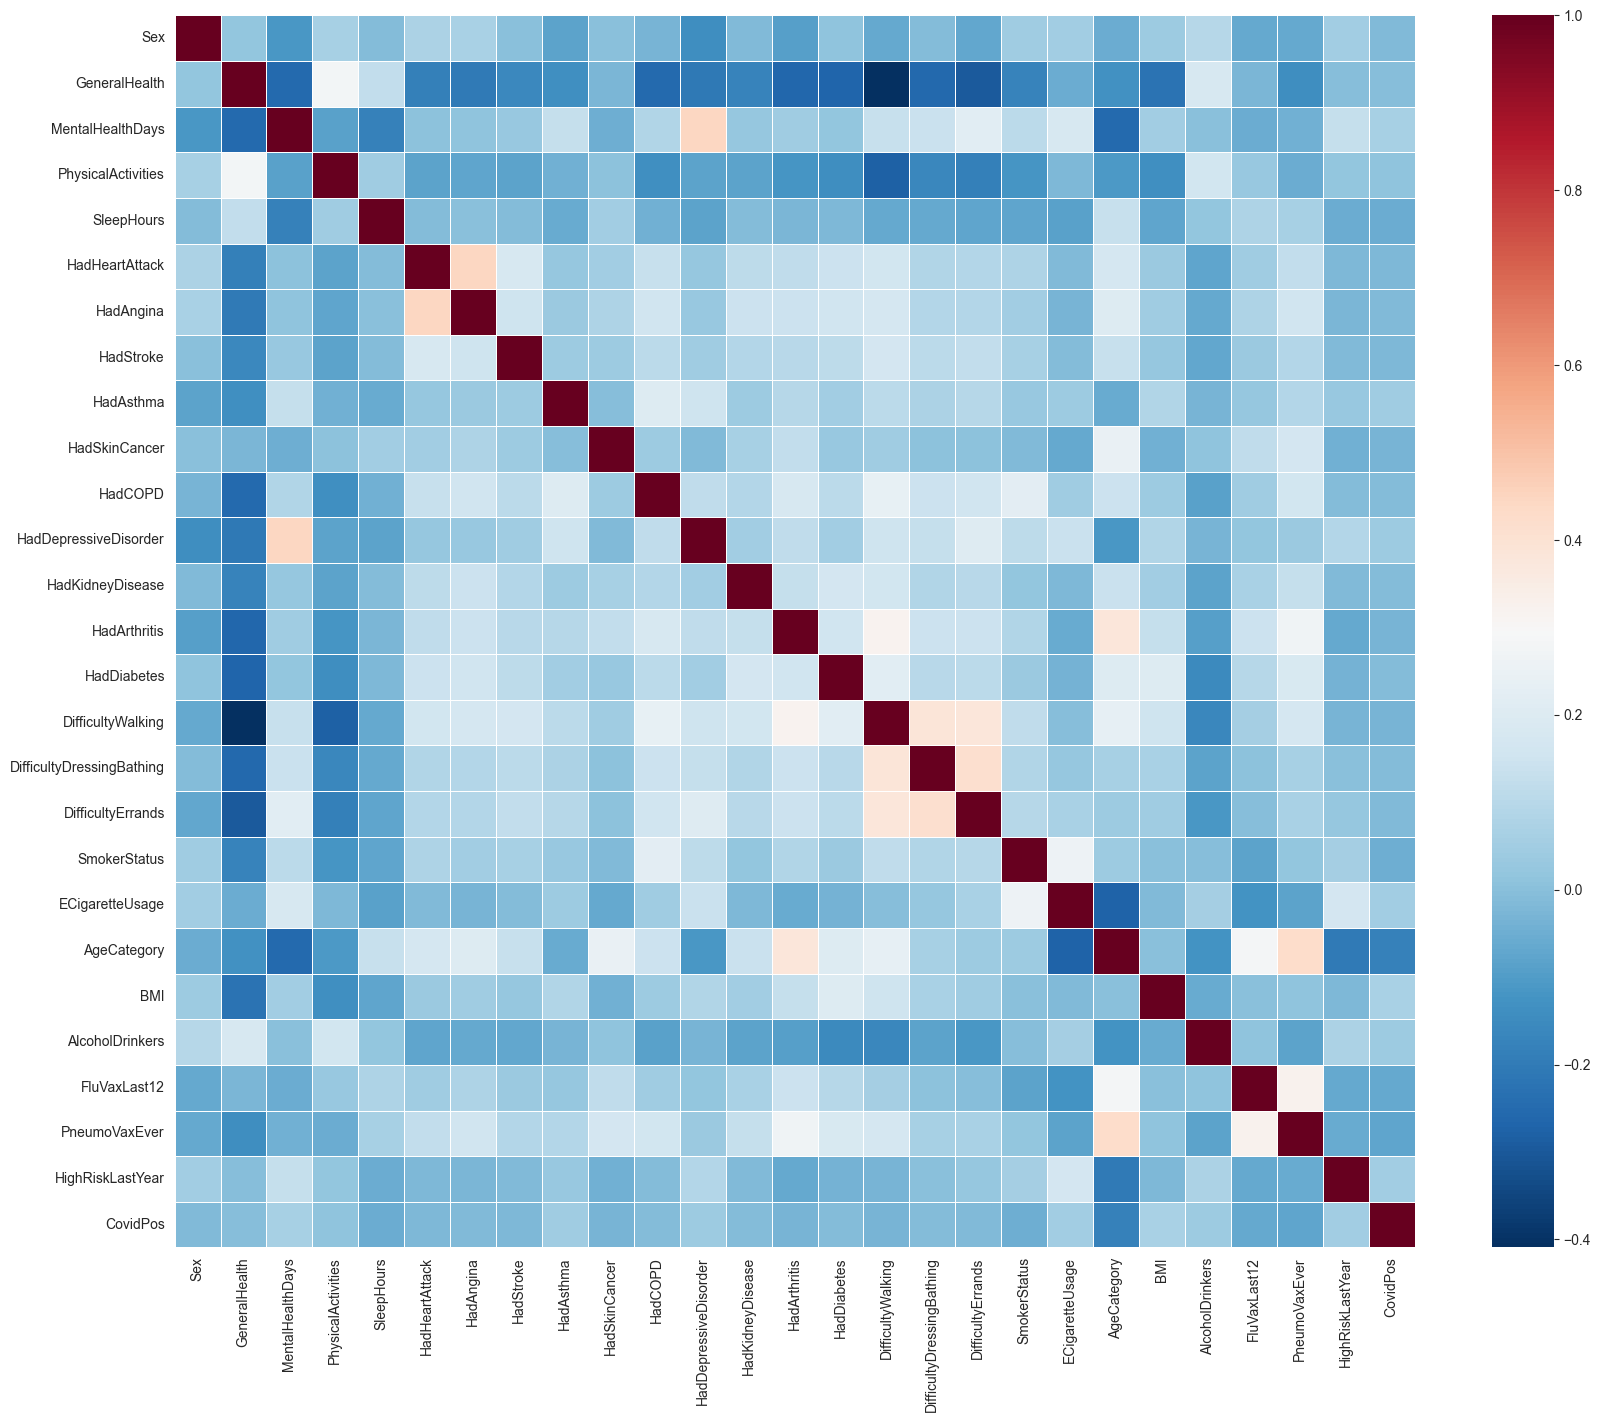

In [155]:
# Вычисление корреляционной матрицы
pearsoncorr = data.corr(method='pearson')

# Создание графика большего размера
fig, ax = plt.subplots(figsize=(20, 16))  # Увеличиваем размер графика

# Создание тепловой карты
sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,  # Убираем числовые значения
            linewidth=0.5,
            ax=ax)

# Отображение графика
plt.show()

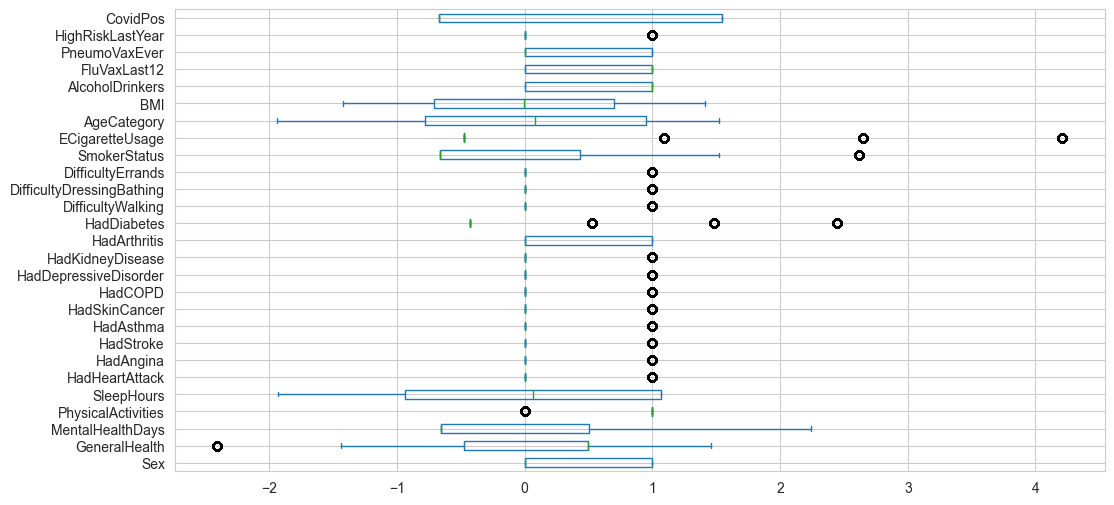

In [156]:
data.plot(kind='box', vert=False, figsize=(12, 6))
plt.show()

In [2]:
features_to_remove = ['State', 'LastCheckupTime', 'RemovedTeeth', 'DeafOrHardOfHearing', 'HeightInMeters', 'PhysicalHealthDays', 'TetanusLast10Tdap',
                      'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'ChestScan', 'HIVTesting', 'WeightInKilograms', 'RaceEthnicityCategory']

data = data.drop(columns=features_to_remove, errors='ignore')

bins_ment = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['BMI'] = bins.fit_transform(data[['BMI']])
data['MentalHealthDays'] = bins_ment.fit_transform(data[['MentalHealthDays']])
data['SleepHours'] = bins.fit_transform(data[['SleepHours']])

ordinal_encoder = OrdinalEncoder()
data[['BMI', 'MentalHealthDays', 'SleepHours']] = ordinal_encoder.fit_transform(data[['BMI', 'MentalHealthDays', 'SleepHours']])

le_features = [
    'Sex', 'PhysicalActivities',  'HadAngina', 'CovidPos',
    'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'AlcoholDrinkers', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands'
]

label_encoders = {}
for feature in le_features:
    if feature in data.columns:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le 

general_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
ecig_usage_order = ['Never used e-cigarettes in my entire life', 'Not at all (right now)', 'Use them some days', 'Use them every day']
smoker_status_order = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day']
age_category_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']
had_diabetes = ['No', 'No, pre-diabetes or borderline diabetes', 'Yes, but only during pregnancy (female)', 'Yes']


ordinal_encoder = OrdinalEncoder(categories=[general_health_order, ecig_usage_order, smoker_status_order, age_category_order, had_diabetes])


data[['GeneralHealth', 'ECigaretteUsage', 'SmokerStatus', 'AgeCategory', 'HadDiabetes']] = ordinal_encoder.fit_transform(data[['GeneralHealth', 'ECigaretteUsage', 'SmokerStatus', 'AgeCategory', 'HadDiabetes']])


X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])


param_grid = {
    'C': [0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga'],  
    'class_weight': ['balanced', None]  
}


grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

D:\Sasha - User\Portsmouth University\Study\MODLES\Expl AI\COURSEWORK\pythonProject\.venv\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\Sasha - User\Portsmouth University\Study\MODLES\Expl AI\COURSEWORK\pythonProject\.venv\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


              precision    recall  f1-score   support

          No       0.96      0.99      0.97     46518
         Yes       0.56      0.24      0.34      2687

    accuracy                           0.95     49205
   macro avg       0.76      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205

[[46018   500]
 [ 2044   643]]


In [3]:
best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

Лучшие параметры:  {'C': 10, 'class_weight': None, 'solver': 'saga'}


In [5]:
import joblib

joblib.dump(best_model, 'best_logistic_regression_model.pkl')

['best_logistic_regression_model.pkl']

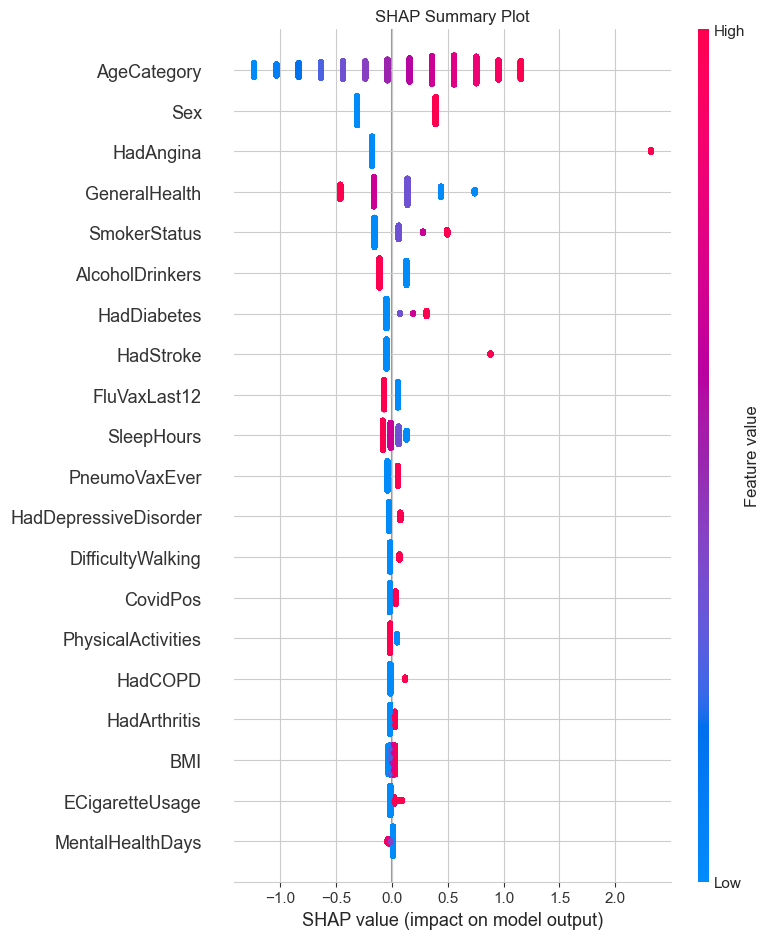

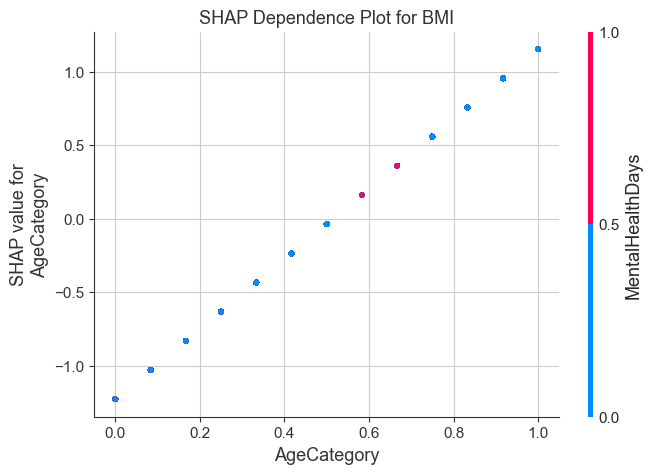

In [54]:
# SHAP Summary Plot
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test)                                       

# SHAP Dependence Plot
shap.dependence_plot('AgeCategory', shap_values.values, X_test, title="SHAP Dependence Plot for BMI")

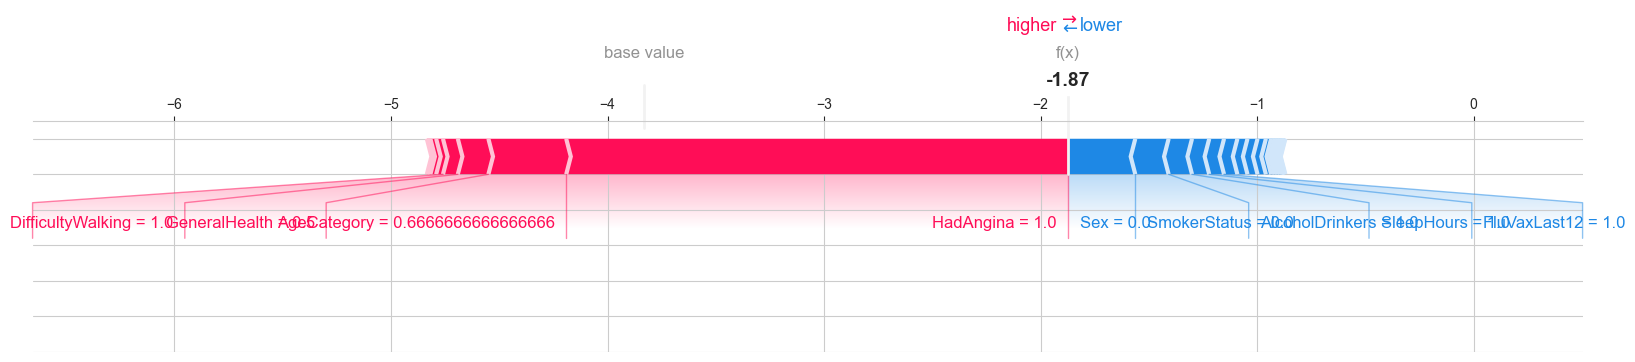

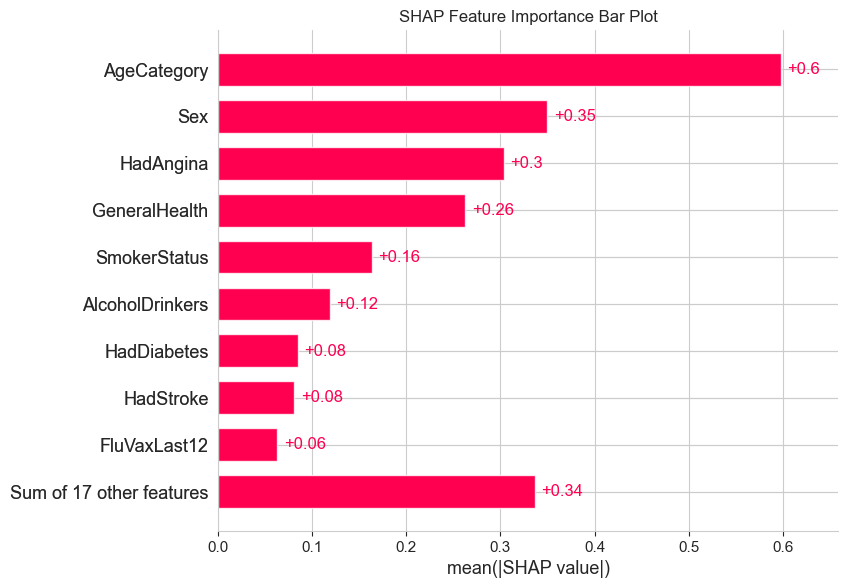

Feature Importance Table
                      Feature  Importance
19                AgeCategory    0.597721
0                         Sex    0.349951
5                   HadAngina    0.303565
1               GeneralHealth    0.262439
17               SmokerStatus    0.163086
21            AlcoholDrinkers    0.118733
13                HadDiabetes    0.084520
6                   HadStroke    0.080766
22               FluVaxLast12    0.062656
4                  SleepHours    0.059655
23              PneumoVaxEver    0.045422
10      HadDepressiveDisorder    0.034909
14          DifficultyWalking    0.021096
25                   CovidPos    0.021065
3          PhysicalActivities    0.021052
9                     HadCOPD    0.020286
12               HadArthritis    0.018624
20                        BMI    0.018234
18            ECigaretteUsage    0.016892
2            MentalHealthDays    0.014791
16          DifficultyErrands    0.012727
8               HadSkinCancer    0.012093
24       

In [53]:
# SHAP Force Plot 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0], matplotlib=True) #title="SHAP Force Plot"

# SHAP Feature Importance Bar Plot
plt.title("SHAP Feature Importance Bar Plot")
shap.plots.bar(shap_values)

# Feature Importance Table
feature_importance = pd.DataFrame(list(zip(X_train.columns, np.mean(np.abs(shap_values.values), axis=0))), 
                                  columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance Table")
print(feature_importance)

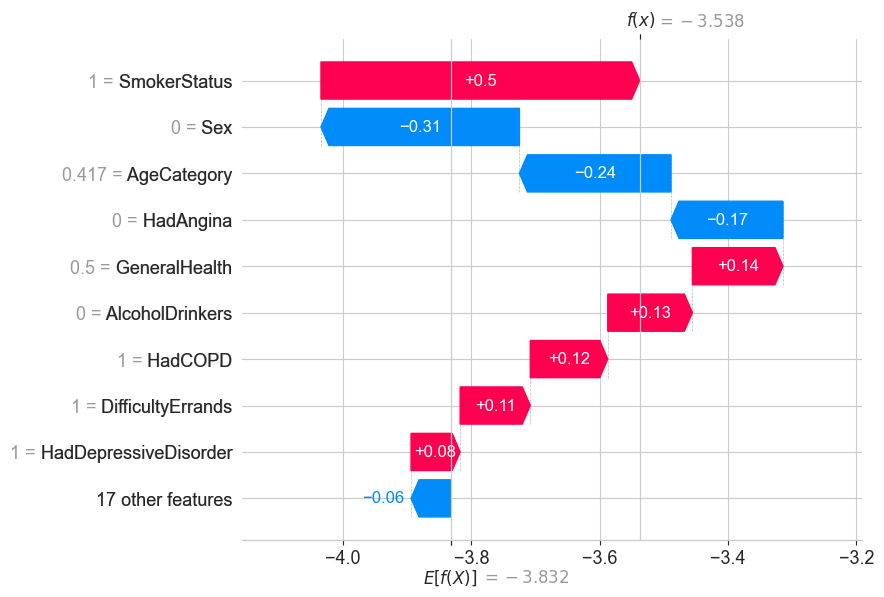

In [51]:
# SHAP Waterfall Plot 
shap.waterfall_plot(shap_values[i])

LIME Explanation:
[('HadAngina <= 0.00', -0.19004809499334402), ('HadStroke <= 0.00', -0.04138411467123845), ('Sex <= 0.00', -0.02216019726504595), ('0.58 < AgeCategory <= 0.83', 0.017155160938588987), ('SmokerStatus <= 0.00', -0.012087847862715618), ('0.50 < GeneralHealth <= 0.75', -0.009685797340030514), ('AlcoholDrinkers <= 0.00', 0.008484968626741992), ('HadCOPD <= 0.00', -0.00740294028772874), ('HadDiabetes <= 0.00', -0.006471060574115354), ('SleepHours <= 0.33', 0.006056328073972027)]


D:\Sasha - User\Portsmouth University\Study\MODLES\Expl AI\COURSEWORK\pythonProject\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


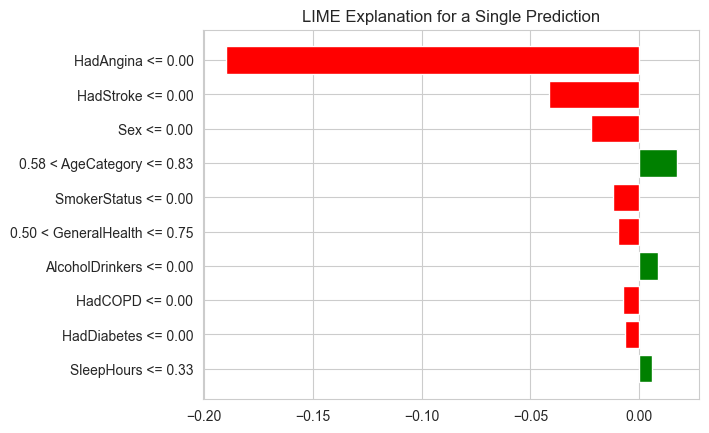

Discretized data (Quartiles):
[[0.         0.5        0.         1.         1.         1.
  0.         0.         0.         0.         0.         0.
  1.         0.         1.         1.         0.         0.
  0.         0.66666667 1.         1.         1.         0.
  0.         0.        ]
 [1.         0.5        0.         0.         1.         0.
  1.         0.         0.         0.         1.         0.
  1.         1.         0.         0.         0.         0.
  0.33333333 0.58333333 1.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         1.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.5        0.         0.         1.         0.
  0.         1.         1.         0.         0.         0.
  1.         1.         1.         0.         0.       

In [58]:
# LIME 
explainer = LimeTabularExplainer(X_train.values, feature_names=list(data.drop('HadHeartAttack', axis=1).columns), 
                                                   class_names=['No Heart Attack', 'Heart Attack'], discretize_continuous=True)

i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test.values[i], best_model.predict_proba, num_features=10)

print('LIME Explanation:')
print(exp.as_list())

exp.as_pyplot_figure()
plt.title("LIME Explanation for a Single Prediction")
plt.show()

# QuartileDiscretizer и DecileDiscretizer
from lime.discretize import QuartileDiscretizer, DecileDiscretizer

X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

# QuartileDiscretizer
quartile_discretizer = QuartileDiscretizer(X_train_array, list(range(X_train_array.shape[1])), feature_names=list(data.drop('HadHeartAttack', axis=1).columns))
discretized_data_quartile = quartile_discretizer.discretize(X_test_array)

# DecileDiscretizer
decile_discretizer = DecileDiscretizer(X_train_array, list(range(X_train_array.shape[1])), feature_names=list(data.drop('HadHeartAttack', axis=1).columns))
discretized_data_decile = decile_discretizer.discretize(X_test_array)

print("Discretized data (Quartiles):")
print(discretized_data_quartile[:5])

print("Discretized data (Deciles):")
print(discretized_data_decile[:5])